# 1.Executive Summary

## Research Topic:

### Ecological Groups Of Birds on Basis of Bone Sizes

## Research Domain:
### The domain of this research includes the living organisms like birds in our case. We actullay used the different sizes of bones of a particular bird's body and then determine from which ecological group the bird belongs.

### The ecological groups of the birds are as follows

##### Swimming Birds
##### Wading Birds
##### Terrestrial Birds
##### Raptors
##### Scansorial Birds
##### Singing Birds

### The fetaures of the birds are as 

###### Length and Diameter of Humerus
###### Length and Diameter of Ulna
###### Length and Diameter of Femur
###### Length and Diameter of Tibiotarsus
###### Length and Diameter of Tarsometatarsus

## Research Question:
### Do the birds belong with equal sizes of bone of leg (bilogically called as tibiotarsus) and huml(bone of wing) belong to group of singing birds group5?

## Research Hypothesis:
### Yes ,they belong to same group


# 2.1 Importing the Libraries:


In [198]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

# 2.2 Loading the Dataset

In [199]:
data=pd.read_csv("bird.csv")


# Exploratory Data Analysis


### Shape of Dataset


In [200]:
data.shape

(420, 12)

### Preview DataSet


In [201]:
data.head()


id   huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw type
0   0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84   SW
1   1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01   SW
2   2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34   SW
3   3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41   SW
4   4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13   SW

### Summary of Data

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      420 non-null    int64  
 1   huml    419 non-null    float64
 2   humw    419 non-null    float64
 3   ulnal   417 non-null    float64
 4   ulnaw   418 non-null    float64
 5   feml    418 non-null    float64
 6   femw    419 non-null    float64
 7   tibl    418 non-null    float64
 8   tibw    419 non-null    float64
 9   tarl    419 non-null    float64
 10  tarw    419 non-null    float64
 11  type    420 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 39.5+ KB


### Check for missing values in dataset

In [203]:
data.isnull()

id   huml   humw  ulnal  ulnaw   feml   femw   tibl   tibw   tarl  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
415  False  False  False  False  False  False  False  False  False  False   
416  False  False  False  False  False  False  False  False  False  False   
417  False  False  False  False  False  False  False  False  False  False   
418  False  False  False  False  False  False  False  False  False  False   
419  False  False  False  False  False  False  False  False  False  False   

      tarw   type  
0    False  False  
1    False  False  
2    False  False  
3    False  False  
4    False  False  
..     ...    ...  
415  False  False  
416  False  False  
417  False  False  
418  False  False  
419  False  False  

[420 rows x 12 columns]

##### As we can see that their is not null value in any of the column

### View the statistical summary of numerical variables

In [204]:
data.describe()

id        huml        humw       ulnal       ulnaw        feml  \
count  420.000000  419.000000  419.000000  417.000000  418.000000  418.000000   
mean   209.500000   64.650501    4.370573   69.115372    3.597249   36.872416   
std    121.387808   53.834549    2.854617   58.784775    2.186747   19.979082   
min      0.000000    9.850000    1.140000   14.090000    1.000000   11.830000   
25%    104.750000   25.170000    2.190000   28.050000    1.870000   21.297500   
50%    209.500000   44.180000    3.500000   43.710000    2.945000   31.130000   
75%    314.250000   90.310000    5.810000   97.520000    4.770000   47.120000   
max    419.000000  420.000000   17.840000  422.000000   12.000000  117.070000   

             femw        tibl        tibw        tarl        tarw  
count  419.000000  418.000000  419.000000  419.000000  419.000000  
mean     3.220883   64.662823    3.182339   39.229976    2.930024  
std      2.023581   37.838145    2.080827   23.184313    2.185673  
min      0.930000    5.500000    0.870000    7.770000    0.660000  
25%      1.715000   36.417500    1.565000   23.035000    1.425000  
50%      2.520000   52.120000    2.490000   31.740000    2.230000  
75%      4.135000   82.870000    4.255000   50.250000    3.500000  
max     11.640000  240.000000   11.030000  175.000000   14.090000

### Exploring the type column in data

In [205]:
data['type'].unique()

array(['SW', 'W', 'T', 'R', 'P', 'SO'], dtype=object)

### Declare feature vector and target variable

In [206]:
x=data
y=data['type']

### Convert categorical variable into integers

In [207]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['type'] = le.fit_transform(data['type'])



In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      420 non-null    int64  
 1   huml    419 non-null    float64
 2   humw    419 non-null    float64
 3   ulnal   417 non-null    float64
 4   ulnaw   418 non-null    float64
 5   feml    418 non-null    float64
 6   femw    419 non-null    float64
 7   tibl    418 non-null    float64
 8   tibw    419 non-null    float64
 9   tarl    419 non-null    float64
 10  tarw    419 non-null    float64
 11  type    420 non-null    int32  
dtypes: float64(10), int32(1), int64(1)
memory usage: 37.9 KB


In [209]:
x.head()

id   huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw  type
0   0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84     3
1   1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01     3
2   2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34     3
3   3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41     3
4   4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13     3

In [210]:
data['type'].unique()
#data.fillna(0)

#data = data.astype({"huml":'int', "ulnal":'int',"humw":'int', "ulnaw":'int',"feml":'int', "femw":'int',"tibl":'int', "tibw":'int',"tarl":'int', "tarw":'int'}) 

array([3, 5, 4, 1, 0, 2])

In [211]:
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
rows_with_NaN
data = data.fillna(0)


### Feature Scaling

In [212]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

data = ms.fit_transform(data)
data = pd.DataFrame(data, columns=[x.columns])
data.head()

id      huml      humw     ulnal     ulnaw      feml      femw  \
0  0.000000  0.192333  0.374439  0.170640  0.406667  0.357137  0.317869   
1  0.002387  0.211690  0.371637  0.190829  0.465833  0.401811  0.369416   
2  0.004773  0.190405  0.357063  0.164123  0.440000  0.367900  0.335052   
3  0.007160  0.184881  0.319507  0.155829  0.397500  0.342018  0.302405   
4  0.009547  0.149524  0.271300  0.123436  0.310833  0.289997  0.233677   

       tibl      tibw      tarl      tarw type  
0  0.022917  0.365367  0.221143  0.272534  0.6  
1  0.334250  0.408885  0.237143  0.284599  0.6  
2  0.313958  0.366274  0.218914  0.237048  0.6  
3  0.288208  0.308250  0.204457  0.242016  0.6  
4  0.234458  0.268359  0.182171  0.222143  0.6

### K means Clustering With K=2

In [213]:
from sklearn.cluster import KMeans

data.head()

kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(data)



D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [214]:
kmeans.inertia_

98.9866162379217

## Use elbow method to find optimal number of clusters 

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\utils\valida

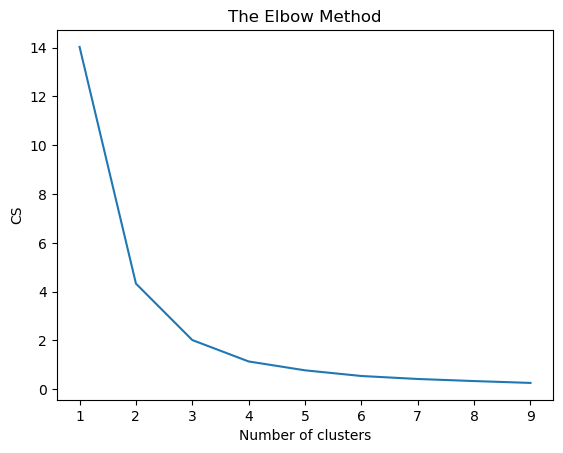

In [215]:

cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data['ulnaw'],data['tibl'])
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


#### So the optimum number of clusters for this data  are 4

In [216]:
x.head()

id   huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw  type
0   0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84     3
1   1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01     3
2   2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34     3
3   3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41     3
4   4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13     3

### Ploting the Graph


In [217]:
df0=x[x.type==0]
df1=x[x.type==1]
df2=x[x.type==2]
df3=x[x.type==3]
df4=x[x.type==4]
df5=x[x.type==5]

plt.scatter(df5['ulnaw'],df5['tibl'],color='red')


### Conclusion
### The birds with large bone of leg and bone of wing belong to the same group